In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from formulaic import Formula, model_matrix

import logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').setLevel(logging.ERROR)
import tensorflow as tf
import keras

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-07-02 15:58:52.013354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 15:58:52.031552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 15:58:52.031582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Trabajo Práctico Nº2 - Laboratorio de Datos

**Integrantes:**
- Martínez, Fausto.
- Oviedo, Santiago.

## Preprocesamiento

### Ejercicio 1

Cargar en un DataFrame los datos del archivo $\texttt{FBRef2020-21.csv}$.

In [2]:
# Guardamos los datos del archivo en el DataFrame FBref
FBref = pd.read_csv("FBRef2020-21.csv")

# Consultamos su cantidad de filas y columnas
FBref.shape

(2823, 128)

### Ejercicio 2

Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna $\texttt{Min}$).

In [3]:
# Nos quedamos con los datos de los jugadores que jugaron más de 500 minutos
FBref = FBref[FBref['Min']>500]

# Verificamos que eliminamos filas
FBref.shape

(1959, 128)

### Ejercicio 3

Eliminar los datos faltantes. Por ejemplo, eliminar columnas con más de 100 datos faltantes y luego las filas con datos faltantes, o convertir los datos faltantes a algún valor apropiado.

In [4]:
# Obtenemos una visualización de los datos
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [5]:
# Vemos cuantos jugadores tienen datos fantantes en cada columna
with pd.option_context("display.max_rows",None):
    print(FBref.isna().sum())

Player                   0
Nation                   0
Pos                      0
Squad                    0
Comp                     0
Age                      0
Born                     0
MP                       0
Starts                   0
Min                      0
90s                      0
Ast/90                   0
npG/90                   0
npG+A/90                 0
xA/90                    2
npxG/90                  2
npxG+xA/90               2
Shots/90                 0
SoTs/90                  0
SoT%                   140
Gls/Shot               140
Gls/SoT                297
AvgShotDist            142
FKSht/90                 2
npxG/Shot              142
np:G-xG                  2
PassCmp/90               2
PassAtt/90               2
PassCmp%                 2
TotDistPass/90           2
PrgDistPass/90           2
ShortCmp/90              2
ShortAtt/90              2
ShortCmp%                2
MedCmp/90                2
MedAtt/90                2
MedCmp%                  2
L

In [6]:
# Definimos nan_cols como las columnas donde la cantidad de NaNs es mas de 50
nan_cols = FBref.isna().sum() > 50

# Definimos keep como las columnas que nos queremos quedar
keep = nan_cols.index[~(nan_cols)]

# Redefinimos a FBref, quedandonos solo con las columnas keep
FBref = FBref[keep]

# Visualizamos el resultado
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


Eliminamos 7 columnas.

In [7]:
# Eliminamos ahora todas las filas donde haya datos faltantes
FBref = FBref.dropna()

# Visualizamos el resultado
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


Eliminamos 18 jugadores

In [8]:
# Verificamos que no hay ninguna columna con datos faltantes
FBref.isna().sum()

Player                 0
Nation                 0
Pos                    0
Squad                  0
Comp                   0
                      ..
Dispossessed/90        0
PassTarget/90          0
PassesReceived/90      0
PassRec%               0
ProgPassReceived/90    0
Length: 121, dtype: int64

### Ejercicio 4

Al finalizar la limpieza de datos, resetear los índices.

In [9]:
# Reseteamos los índices y eliminamos la columna 'index' que tiene los indices anteriores, ya que no la usaremos
FBref = FBref.reset_index().drop('index',axis=1)

# Visualizamos el resultado
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1937,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1938,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1939,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


### Ejercicio 5

Definir el DataFrame $\texttt{data\_num}$ que solo contenga las variables numéricas, a partir de la columna $\texttt{Ast/90}$, inclusive. Para clustering y clasificación no vamos a utilizar las variables categóricas ni edad ni minutos jugados.

In [10]:
# Obtenemos los nombres de las primeras 20 columnas
FBref.columns[0:20]

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Ast/90', 'npG/90', 'npG+A/90', 'xA/90',
       'npxG/90', 'npxG+xA/90', 'Shots/90', 'SoTs/90', 'FKSht/90'],
      dtype='object')

Observamos que la columna $\texttt{Ast/90}$ es la N°12, así que decidimos borrar todas las columnas hasta esa.

In [11]:
# Eliminamos todas las columnas previas a Ast/90
data_num = FBref.drop(FBref.columns[0:11],axis=1)

# Visualizamos el resultado
data_num

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.00,0.14,0.14,0.00,0.09,0.09,1.11,0.14,0.00,0.06,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1937,0.19,0.19,0.39,0.11,0.22,0.33,2.13,0.84,0.00,-0.03,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1938,0.17,0.14,0.31,0.18,0.11,0.28,1.03,0.41,0.03,0.03,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1939,0.21,0.21,0.42,0.14,0.12,0.26,1.47,0.63,0.07,0.09,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [12]:
# Obtenemos información del dataset data_num
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Columns: 110 entries, Ast/90 to ProgPassReceived/90
dtypes: float64(105), object(5)
memory usage: 1.6+ MB


Observamos que tenemos 5 columnas que son de tipo $\texttt{object}$, veamos que tienen.

In [13]:
# Definimos columnas_object como las columnas que son de tipo object
columnas_object = data_num.select_dtypes(include='object')

# Visualizamos dichas columnas
columnas_object

,%TchsDefPen,%TchsDefThrd,%TchsMidThrd,%TchsAttThrd,%TchsAttPen
0,0.05431547619,0.306547619,0.4851190476,0.2604166667,0.0287202381
1,0.1336923077,0.5769230769,0.4723076923,0.01969230769,0.01
2,0.1653027823,0.6055646481,0.4320785597,0.02929623568,0.01865793781
3,0.06929674099,0.4065180103,0.5317324185,0.1260720412,0.01012006861
4,0.1458607096,0.5164257556,0.4914586071,0.08186596583,0.008015768725
...,...,...,...,...,...
1936,0.0137254902,0.1408496732,0.5261437908,0.4117647059,0.05
1937,0.007679180887,0.1155290102,0.4982935154,0.4658703072,0.06604095563
1938,0.02243186583,0.1192872117,0.4444444444,0.5303983229,0.08092243187
1939,0.01461716937,0.2044083527,0.3851508121,0.5104408353,0.08607888631


Observamos que son en realidad variables numéricas, así que si el Clustering no se queja, las dejamos.

## Clustering

### Ejercicio 6

Nuestro primer objetivo es realizar algún agrupamiento de jugadores con características similares.

#### Inciso a

Seleccionar dos variables cualesquiera de los datos y realizar un gráfico de dispersión de una variable en función de la otra para el total de las observaciones. ¿Pueden encontrar fácilmente grupos distintos?

In [14]:
# Visualizamos algunas de las columnas disponibles para elegir
data_num.columns

Index(['Ast/90', 'npG/90', 'npG+A/90', 'xA/90', 'npxG/90', 'npxG+xA/90',
       'Shots/90', 'SoTs/90', 'FKSht/90', 'np:G-xG',
       ...
       'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90',
       'CarryIntoBox/90', 'Miscontrol/90', 'Dispossessed/90', 'PassTarget/90',
       'PassesReceived/90', 'PassRec%', 'ProgPassReceived/90'],
      dtype='object', length=110)

Seleccionamos las variables $\texttt{LowPass/90}$ y $\texttt{Shots/90}$ que creemos que podrían no estar tan relacionadas

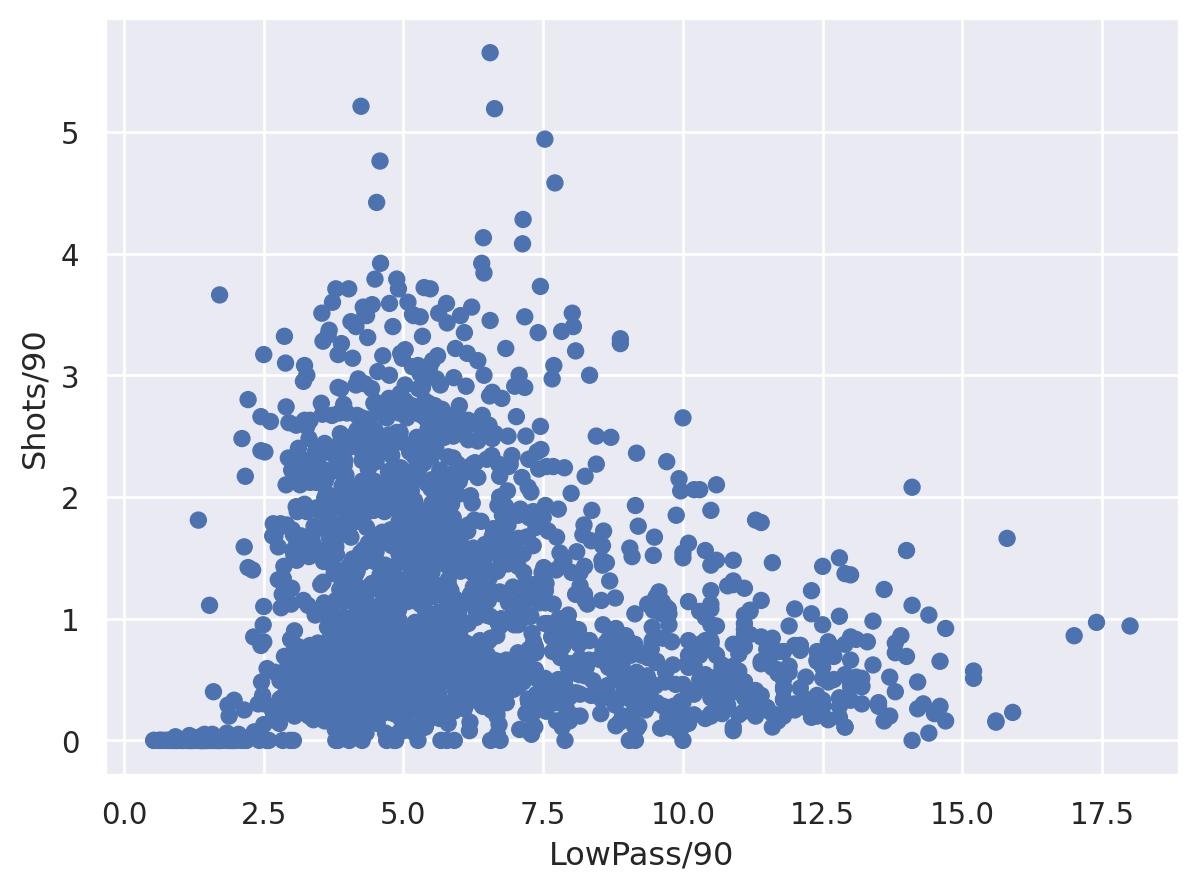

In [15]:
# Realizamos el gráfico de dispersión pedido
(
    so.Plot(data=data_num,x="LowPass/90",y="Shots/90")
    .add(so.Dot())
)

No se observa ningún tipo de cluster.

#### Inciso b

Escalar los datos y realizar un análisis de componentes principales, quedándose solo con las dos primeras componentes. Realizar un gráfico como el del punto anterior. ¿Cuántos clusters puede distinguir en el gráfico? ¿A qué características de los jugadores pueden corresponder los clusters? ¿Cómo pueden verificar su conjetura? (realizar una visualización o algún cálculo)

---------------------------
Primero, escalamos los datos

In [16]:
# Redefinimos data_num como los datos escalados
data_num[data_num.columns] = MinMaxScaler().fit_transform(data_num)

# Observamos el resultado
data_num

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.065789,0.000,0.029586,0.074074,0.066667,0.086207,0.161062,0.118577,0.126050,0.373737,...,0.311029,0.375974,0.266200,0.138138,0.122677,0.162,0.365111,0.356109,0.886792,0.151948
1,0.000000,0.072,0.053254,0.018519,0.055556,0.051724,0.083186,0.063241,0.000000,0.474747,...,0.426314,0.117532,0.043783,0.009009,0.046468,0.094,0.380132,0.390166,0.952830,0.014286
2,0.000000,0.000,0.000000,0.000000,0.088889,0.077586,0.164602,0.083004,0.000000,0.343434,...,0.383210,0.074026,0.012259,0.000000,0.026022,0.014,0.278991,0.287995,0.963836,0.000000
3,0.000000,0.056,0.041420,0.055556,0.055556,0.068966,0.116814,0.059289,0.000000,0.454545,...,0.297003,0.210390,0.115587,0.000000,0.040892,0.000,0.290006,0.293316,0.937107,0.038312
4,0.039474,0.000,0.017751,0.055556,0.033333,0.051724,0.046018,0.000000,0.000000,0.404040,...,0.548782,0.240909,0.178634,0.009009,0.083643,0.052,0.451232,0.464666,0.957547,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.000000,0.112,0.082840,0.000000,0.100000,0.077586,0.196460,0.055336,0.000000,0.494949,...,0.240900,0.225325,0.243433,0.126126,0.180297,0.194,0.252954,0.161345,0.487421,0.180519
1937,0.250000,0.152,0.230769,0.203704,0.244444,0.284483,0.376991,0.332016,0.000000,0.404040,...,0.453339,0.565584,0.350263,0.309309,0.407063,0.516,0.523333,0.409323,0.625786,0.536364
1938,0.223684,0.112,0.183432,0.333333,0.122222,0.241379,0.182301,0.162055,0.025210,0.464646,...,0.464970,0.483766,0.441331,0.330330,0.429368,0.572,0.434208,0.315666,0.561321,0.533117
1939,0.276316,0.168,0.248521,0.259259,0.133333,0.224138,0.260177,0.249012,0.058824,0.525253,...,0.328818,0.340260,0.245184,0.336336,0.546468,0.490,0.345083,0.235845,0.517296,0.399351


In [17]:
# Verificamos que el máximo de cada columna está en 1
data_num.max()

Ast/90                 1.0
npG/90                 1.0
npG+A/90               1.0
xA/90                  1.0
npxG/90                1.0
                      ... 
Dispossessed/90        1.0
PassTarget/90          1.0
PassesReceived/90      1.0
PassRec%               1.0
ProgPassReceived/90    1.0
Length: 110, dtype: float64

In [18]:
# Iniciamos un PCA indicando que queremos las primeras dos direcciones principales z1 y z2
pca = PCA(n_components = 2)

# Definimos las componentes principales como los datos escalados
componentesPrincipales = pca.fit_transform(data_num)

# Visualizamos el resultado
display(componentesPrincipales)

array([[-0.34036939,  0.45523206],
       [-1.17819738,  0.04835493],
       [-1.1383283 , -0.34705101],
       ...,
       [ 1.18861409,  0.02762972],
       [ 1.06498396, -0.34628526],
       [ 0.5034153 ,  0.31933506]])

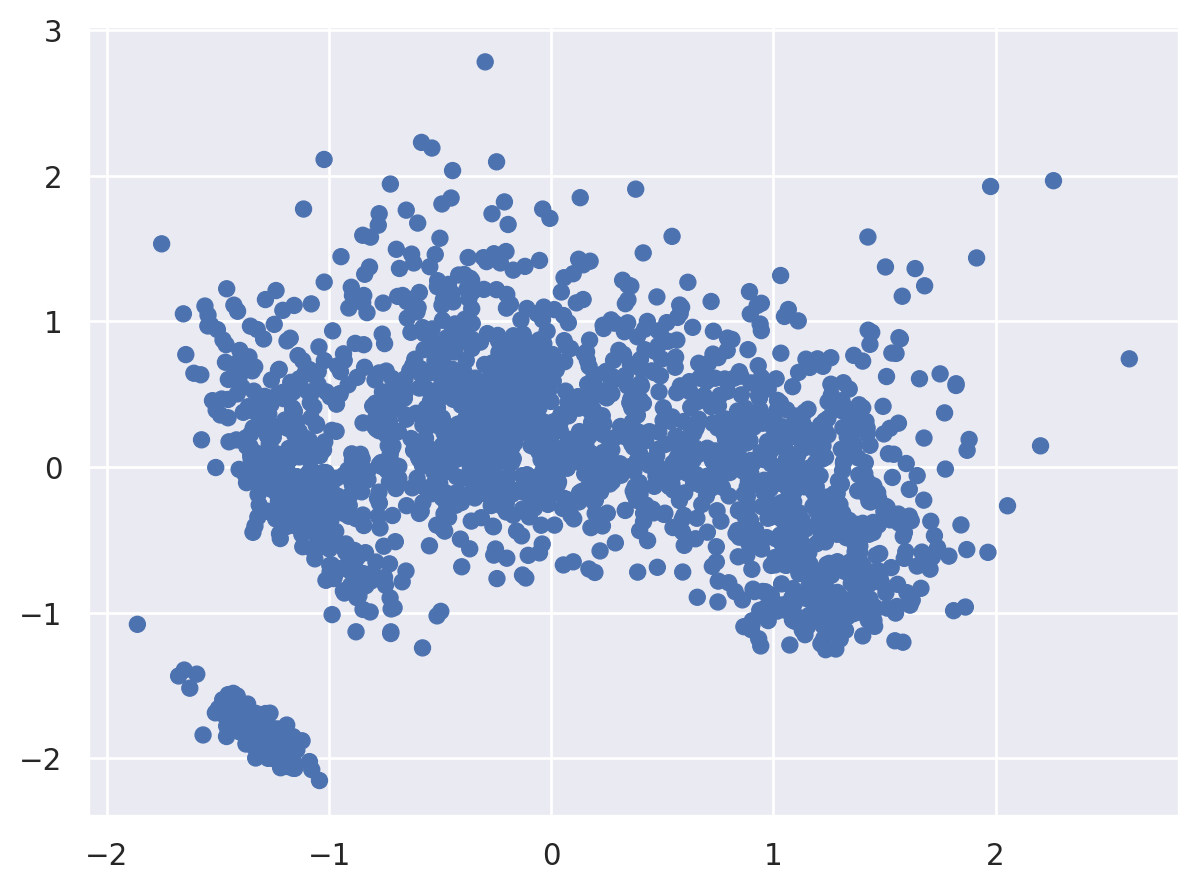

In [19]:
# Graficamos los datos en función de las componentes principales
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1])
    .add(so.Dot())
    .add(so.Text())
)

Sospechamos que puede ser que sean arqueros y jugadores de campo, para chequearlo, coloreamos los puntos según la posición en el campo

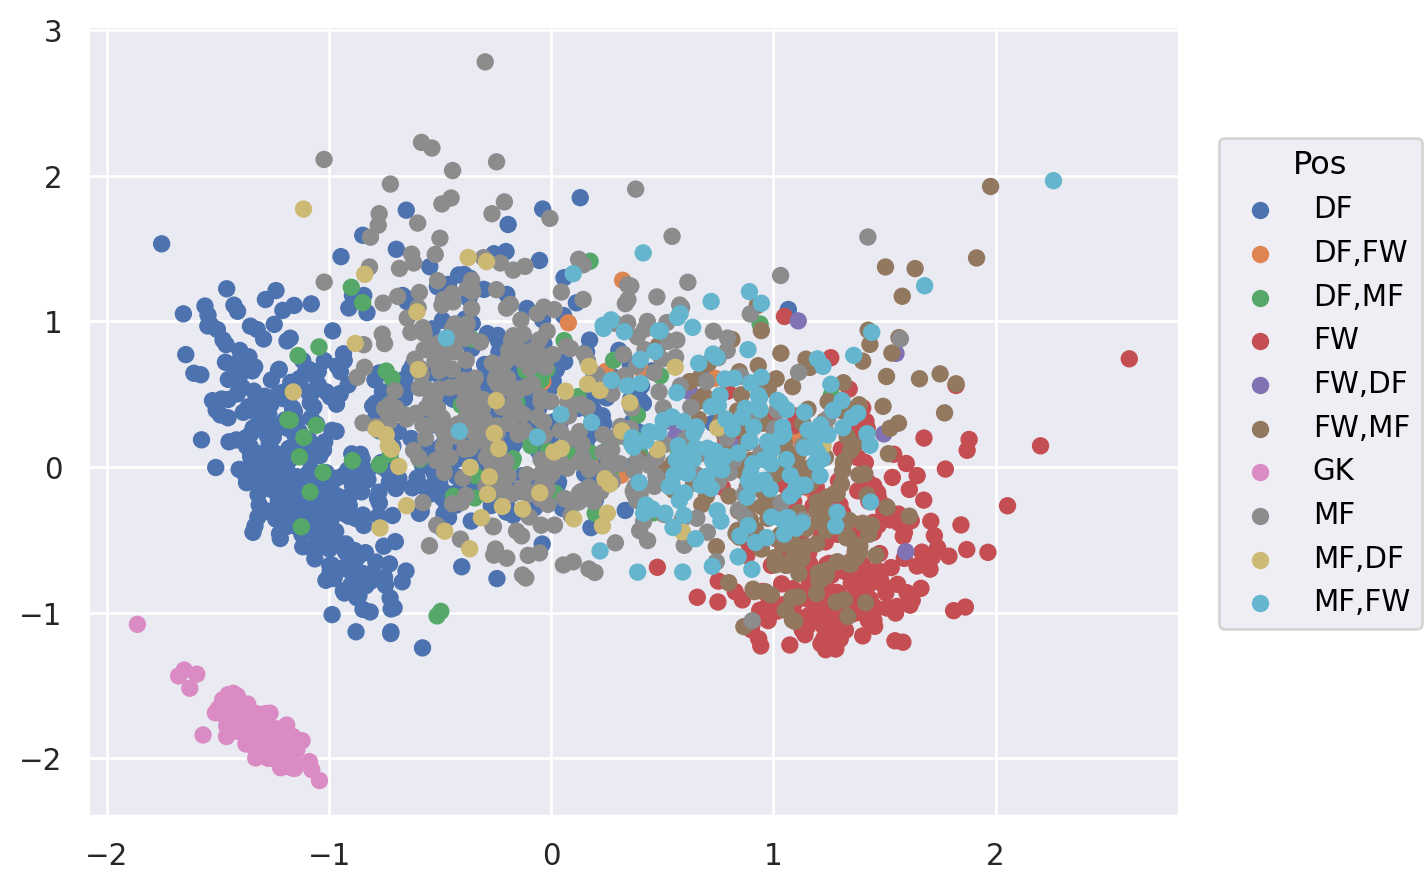

In [20]:
# Graficamos en función de las componentes principales, coloreando según la posición
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1],color=FBref.Pos)
    .add(so.Dot())
)

Efectivamente, en el gráfico se pueden apreciar dos clusters, uno para arqueros y otro para jugadores de campo.

#### Inciso c

Para la cantidad de clusters observados en el ítem anterior, realizar un agrupamiento por $k$-medias, y colorear los puntos según las etiquetas obtenidas. ¿Coinciden las etiquetas con lo esperado?

In [21]:
# Inicializamos un KMeans, con 2 clusters: Arqueros y Jugadores de campo
kmeans = KMeans(n_clusters=2)

# Definimos etiquetas1 como la predicción con todos los datos
etiquetas1 = kmeans.fit_predict(data_num)

# Definimos etiquetas2 como la predicción usando solo las componentes principales
etiquetas2 = kmeans.fit_predict(componentesPrincipales)

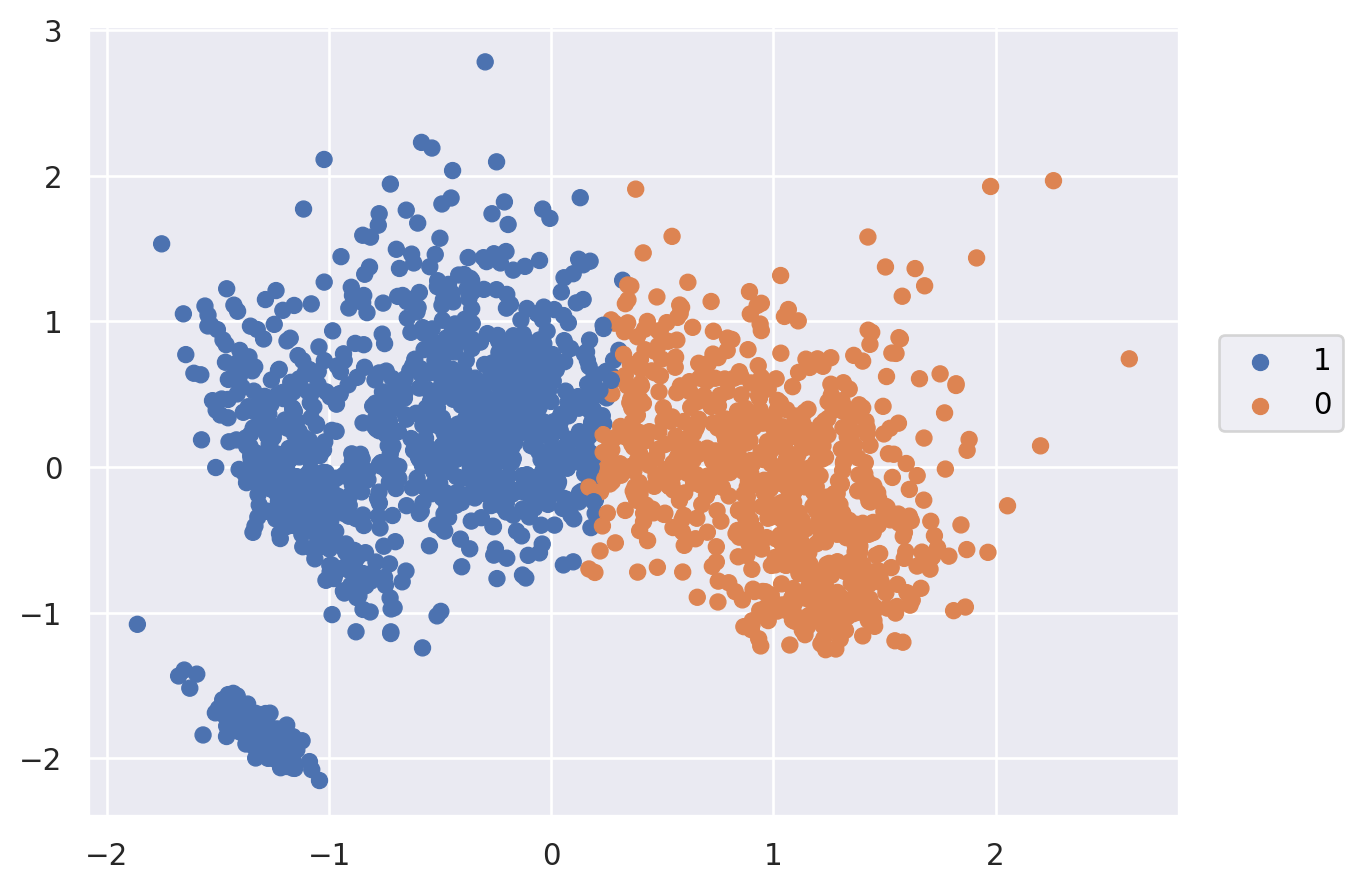

In [22]:
# Coloreamos usando la predicción con todos los datos
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1], color=etiquetas1.astype("str"))
    .add(so.Dot())
)

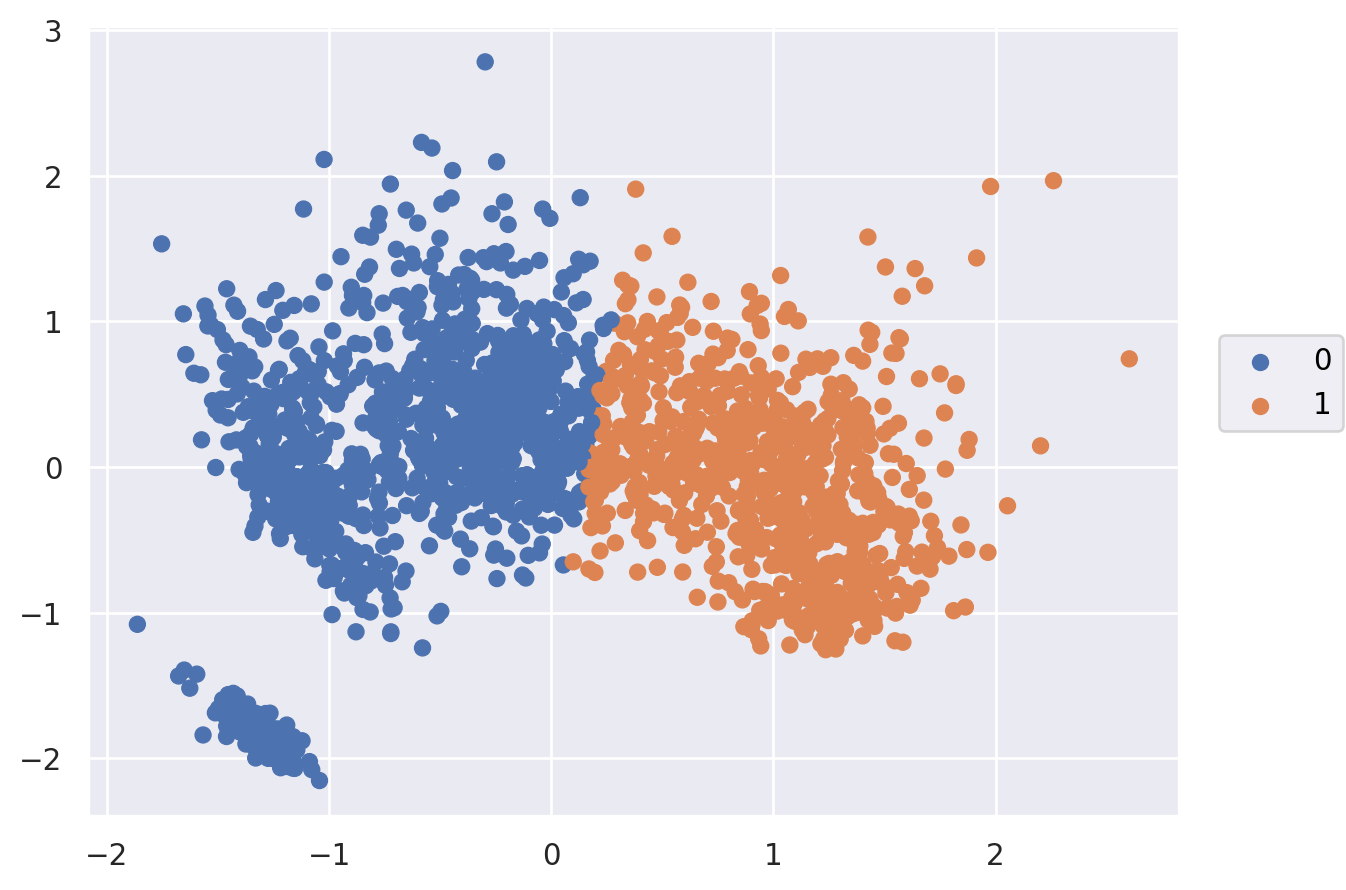

In [23]:
# Graficamos según la predicción para las componentes principales
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1], color=etiquetas2.astype("str"))
    .add(so.Dot())
)

Utilizando K-Means, no obtenemos un resultado satisfactorio usando los datos originales, ni usando las componentes principales, y esto se puede deber a que los clusters no son ni esféricos ni isotrópicos, aparte de que tienen una cantidad muy dispar de puntos.

#### Inciso d

Repetir el agrupamiento utilizando DBSCAN. ¿Cómo elegirían en este caso un valor de $\epsilon$ apropiado? Sugerencia: consultar la sección "Selección del hiperparámetro $eps$" del Notebook de la clase de DBSCAN (o utilizar cualquier otra técnica que consideren apropiada)

In [24]:
# Definimos un NearestNeighbors que mida los dos vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors = 2)

# Lo entrenamos con las componentes principales
neighbors_fit = neighbors.fit(componentesPrincipales)

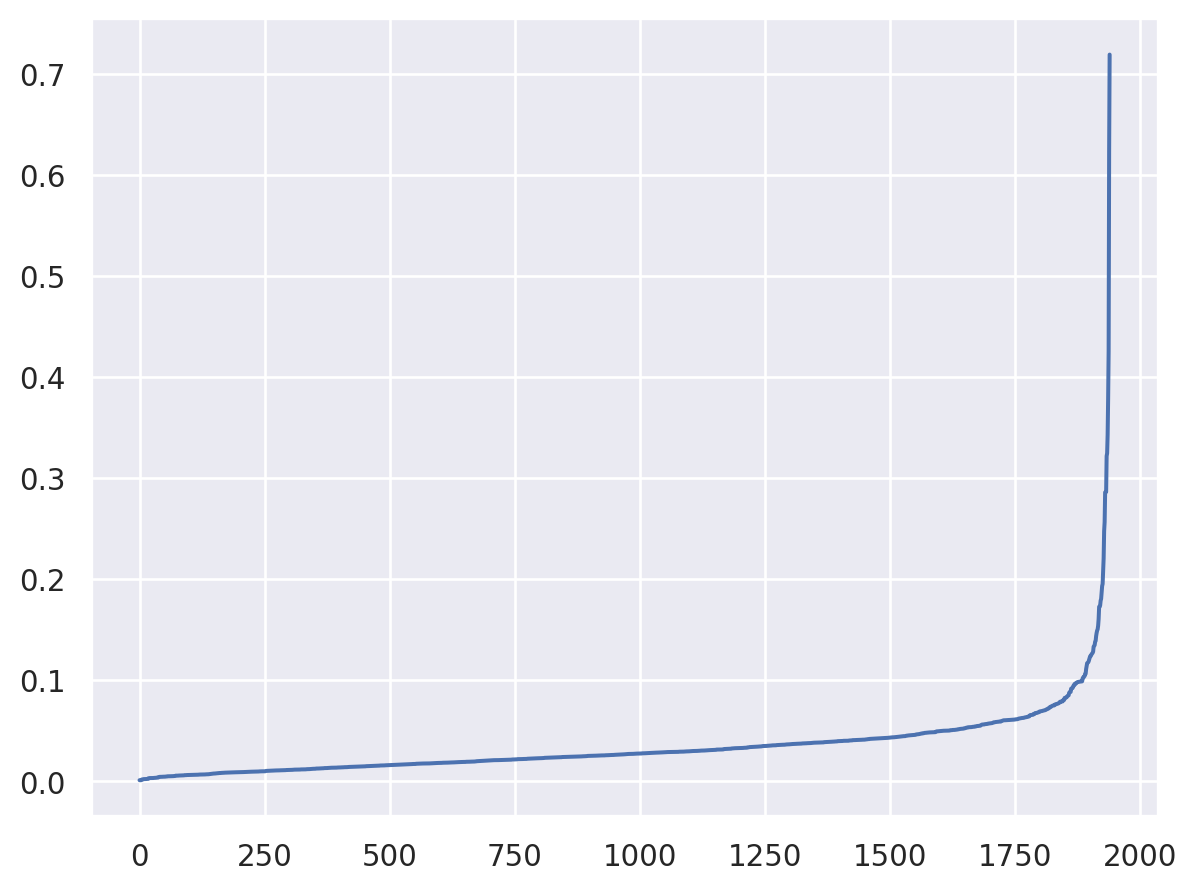

In [25]:
# Definimos las distancias y los indices como los kneighbors de las componentesPrincipales
distances, indices = neighbors_fit.kneighbors(componentesPrincipales)
distances = distances[:,1]
distances = np.sort(distances, axis = 0)

# En base a esto graficamos buscando el codo que nos ayude a elegir el epsilon
so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

Observamos que nos servirá un $\epsilon$ entre $0.1$ y $0.2$

In [26]:
# Definimos un objecto DBSCAN con epsilon = 0.2 y minSamples = 8
dbscan = DBSCAN(eps = 0.20, min_samples=8)

# Entrenamos y predecimos usando las componentes principales
etiquetas3 = dbscan.fit_predict(componentesPrincipales)

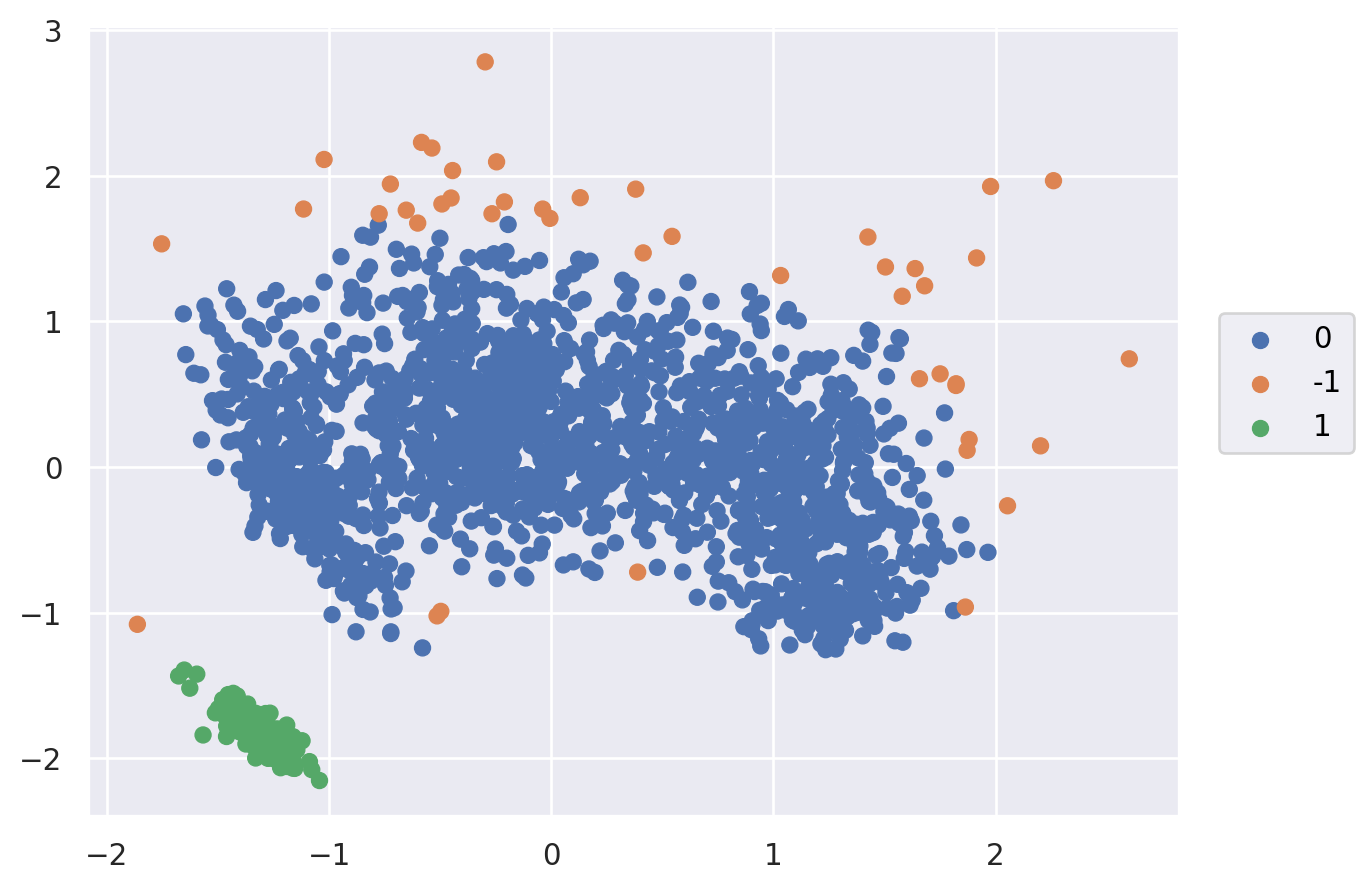

In [27]:
# Graficamos la clasificación obtenida con DBSCAN
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1], color=etiquetas3.astype("str"))
    .add(so.Dot())
)

Podemos observar que DBSCAN funcionó muchísimo mejor que K-means, que es lo que esperábamos por la forma de los clusters.

#### Inciso e

Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en lugar de solo las dos componentes principales, modificando los valores de $\texttt{epsilon}$ y $\texttt{minPts}$ convenientemente. ¿Con cuál de las dos opciones obtienen mejores resultados?

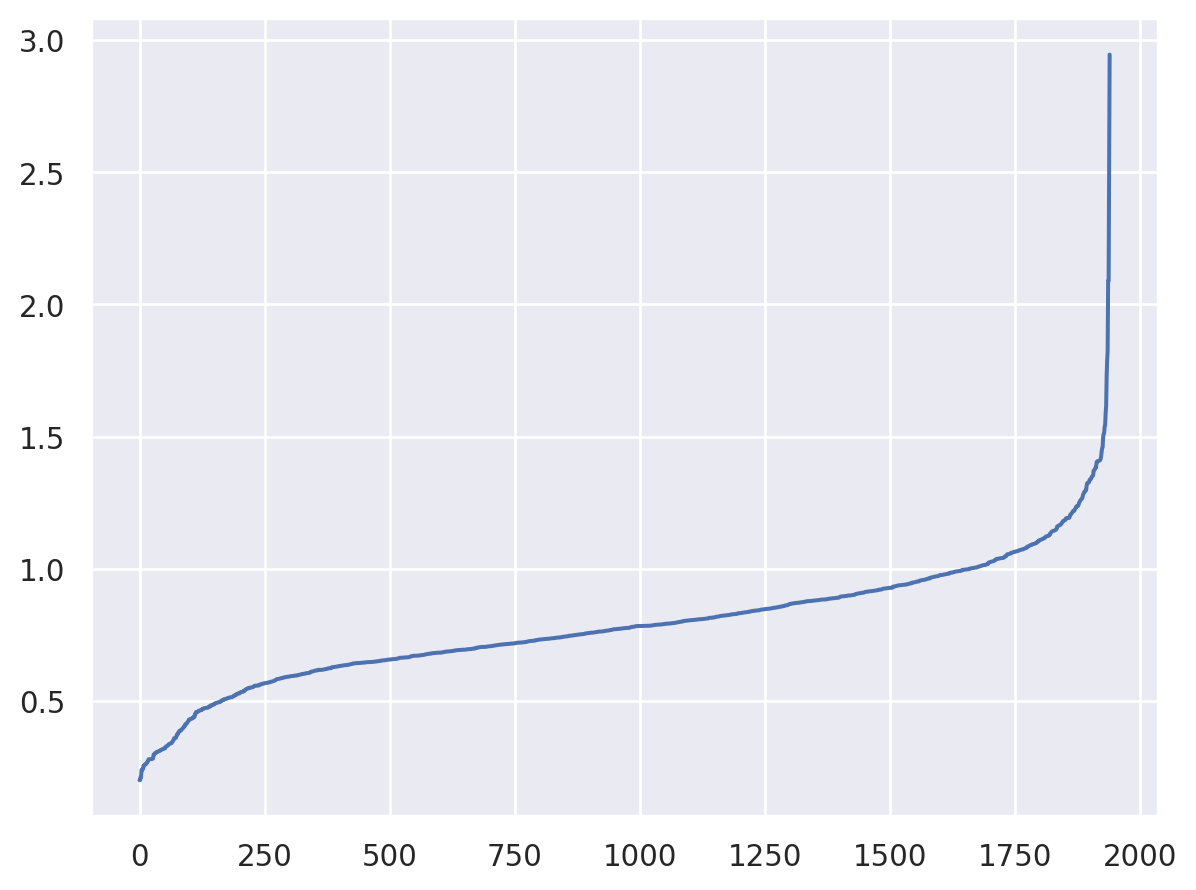

In [28]:
# Repetimos el proceso de la vez pasada, el cual ahora es mucho más necesario, ya que no es fácil ver cuál es el epsilon
# o el minSamples adecuado para una muestra de mas de 150 columnas
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors_fit = neighbors.fit(data_num)
distances, indices = neighbors_fit.kneighbors(data_num)
distances = distances[:,1]
distances = np.sort(distances, axis = 0)

so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

Observamos que podemos hallar el codo entre $1.4$ y $1.6$

In [29]:
# Definimos un DBSCAN con epsilon = 1.5 y minSamples = 8
dbscan = DBSCAN(eps = 1.5, min_samples=8)

# Definimos etiquetas4 como las predicciones del modelo DBSCAN utilizando todos los datos
etiquetas4 = dbscan.fit_predict(data_num)

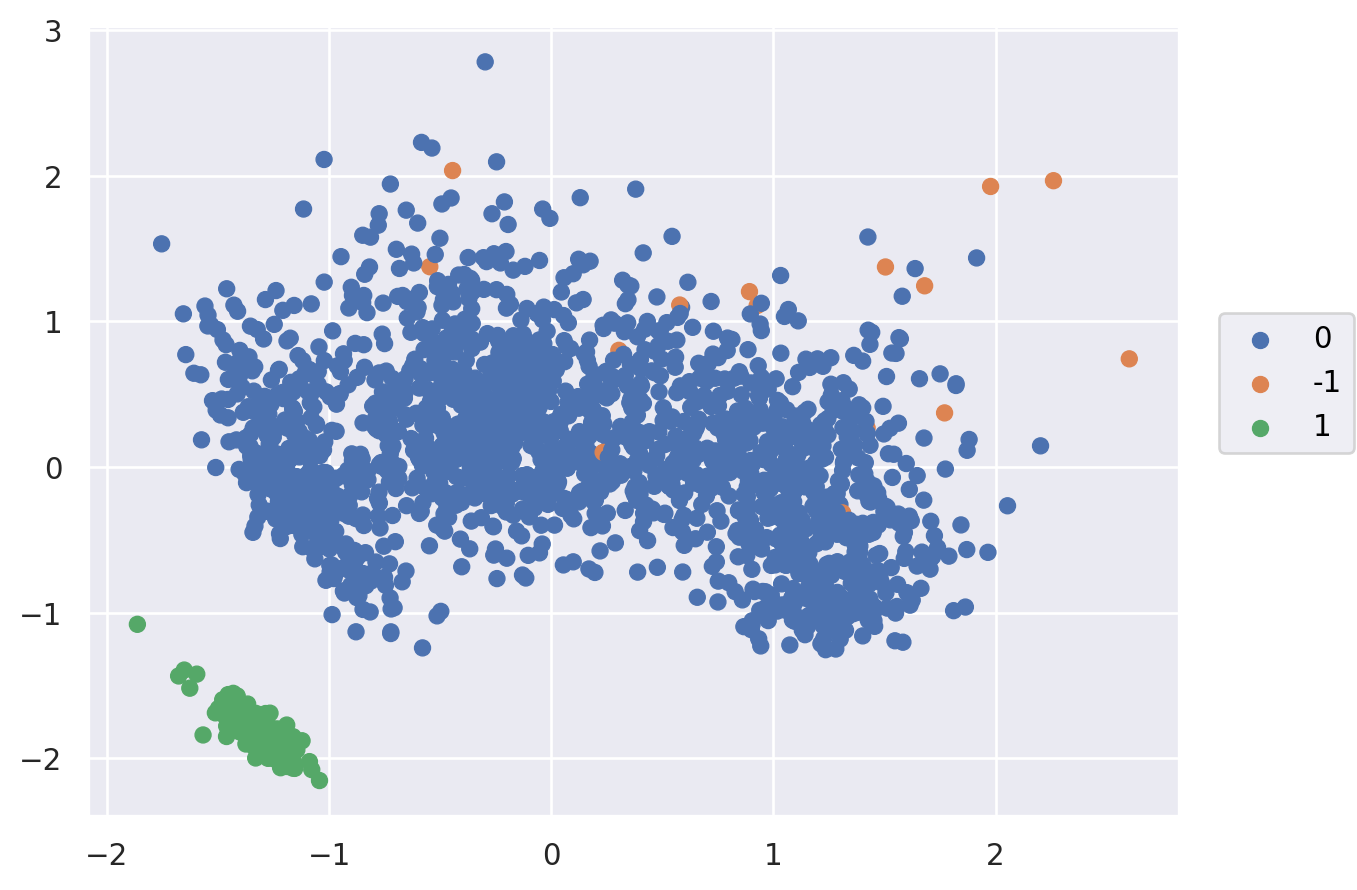

In [30]:
(
    so.Plot(x=componentesPrincipales[:,0],y=componentesPrincipales[:,1], color=etiquetas4.astype("str"))
    .add(so.Dot())
)

Nosotros opinamos que obtenemos mejores resultados cuando usamos todas las variables originales, pues obtenemos menos outliers, es decir, que hay más puntos que son correctamente clasificados como jugadores de campo. Esto tiene sentido porque estamos usando toda la información a disposición y no solo una proyección en dos variables.


## Clasificación

### Ejercicio 7

Ahora queremos poder predecir la posición en la que juega cada jugador según sus datos estadístico utilizando $KNN$. En la columna $\texttt{Pos}$ encontramos la posición de los jugadores. Para la mayoría de los jugadores se indica una única posición pero algunos jugadores tienen dos posiciones. Para simplificar el análisis vamos a considerar una única posición por jugador.

#### Inciso a

Definir la variable $\texttt{Pos\_filt}$ que es la columna $\texttt{Pos}$, pero donde los jugadores deben tener una sola posición (pueden quedarse sólo con la primera posición de cada jugador o eliminar los jugadores con dos posiciones, lo que consideren más conveniente).

In [31]:
# Definimos Pos_filt como la posicion para los jugadores que tienen una sola, y la primera que aparece para los que tienen más de una.
FBref["Pos_filt"]=FBref["Pos"].apply(lambda x: x[:2])

In [32]:
# Visualizamos el resultado
FBref

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_filt
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,DF
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,DF
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,DF
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,DF
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78,MF
1937,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26,MF
1938,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21,MF
1939,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15,MF


#### Inciso b

Construir el DataFrame $\texttt{data\_clasif}$ que resulta de agregarle la columna $\texttt{Pos\_filt}$ al DataFrame $\texttt{data\_num}$. Dividir $\texttt{data\_num}$ en un 80% para entrenamiento y un 20% para testeo.

In [33]:
# Definimos data_clasif como una copia de data_num
data_clasif = data_num.copy()

# Y le agregamos la columna Pos_filt
data_clasif["Pos_filt"] =  FBref["Pos_filt"]

# Visualizamos el resultado
data_clasif

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_filt
0,0.065789,0.000,0.029586,0.074074,0.066667,0.086207,0.161062,0.118577,0.126050,0.373737,...,0.375974,0.266200,0.138138,0.122677,0.162,0.365111,0.356109,0.886792,0.151948,DF
1,0.000000,0.072,0.053254,0.018519,0.055556,0.051724,0.083186,0.063241,0.000000,0.474747,...,0.117532,0.043783,0.009009,0.046468,0.094,0.380132,0.390166,0.952830,0.014286,DF
2,0.000000,0.000,0.000000,0.000000,0.088889,0.077586,0.164602,0.083004,0.000000,0.343434,...,0.074026,0.012259,0.000000,0.026022,0.014,0.278991,0.287995,0.963836,0.000000,DF
3,0.000000,0.056,0.041420,0.055556,0.055556,0.068966,0.116814,0.059289,0.000000,0.454545,...,0.210390,0.115587,0.000000,0.040892,0.000,0.290006,0.293316,0.937107,0.038312,DF
4,0.039474,0.000,0.017751,0.055556,0.033333,0.051724,0.046018,0.000000,0.000000,0.404040,...,0.240909,0.178634,0.009009,0.083643,0.052,0.451232,0.464666,0.957547,0.045455,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.000000,0.112,0.082840,0.000000,0.100000,0.077586,0.196460,0.055336,0.000000,0.494949,...,0.225325,0.243433,0.126126,0.180297,0.194,0.252954,0.161345,0.487421,0.180519,MF
1937,0.250000,0.152,0.230769,0.203704,0.244444,0.284483,0.376991,0.332016,0.000000,0.404040,...,0.565584,0.350263,0.309309,0.407063,0.516,0.523333,0.409323,0.625786,0.536364,MF
1938,0.223684,0.112,0.183432,0.333333,0.122222,0.241379,0.182301,0.162055,0.025210,0.464646,...,0.483766,0.441331,0.330330,0.429368,0.572,0.434208,0.315666,0.561321,0.533117,MF
1939,0.276316,0.168,0.248521,0.259259,0.133333,0.224138,0.260177,0.249012,0.058824,0.525253,...,0.340260,0.245184,0.336336,0.546468,0.490,0.345083,0.235845,0.517296,0.399351,MF


In [34]:
# Dividimos el dataset en datos de entrenamiento y testeo
data_clasif_train, data_clasif_test = train_test_split(data_clasif,test_size=0.2,random_state=42)

#### Inciso c

Aplicar un esquema de validación en el conjunto de entrenamiento para seleccionar el valor óptimo de $K$. (Esto puede demorar mucho si prueban muchos valores de $K$, pueden hacerlo hasta un valor máximo de $K$=20.)

**Sugerencia:** puede resultar de ayuda $\texttt{KNeighborsClassifier}$ de $\texttt{sklearn}$ e investigar esa librería para aplicar esquemas de validación.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Definimos las variables predictoras y las predichas
X_train = data_clasif_train.drop("Pos_filt",axis=1)
y_train = data_clasif_train["Pos_filt"]
X_test = data_clasif_test.drop("Pos_filt",axis=1)
y_test = data_clasif_test["Pos_filt"]

In [37]:
# Creamos una lista con los valores de k en los que vamos a evaluar el rendimiento de KNeighborsClassifier
k_values = range (1,21)
scores = []

# Para cada valor de k, vamos guardando la media del score por validación cruzada en una lista scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

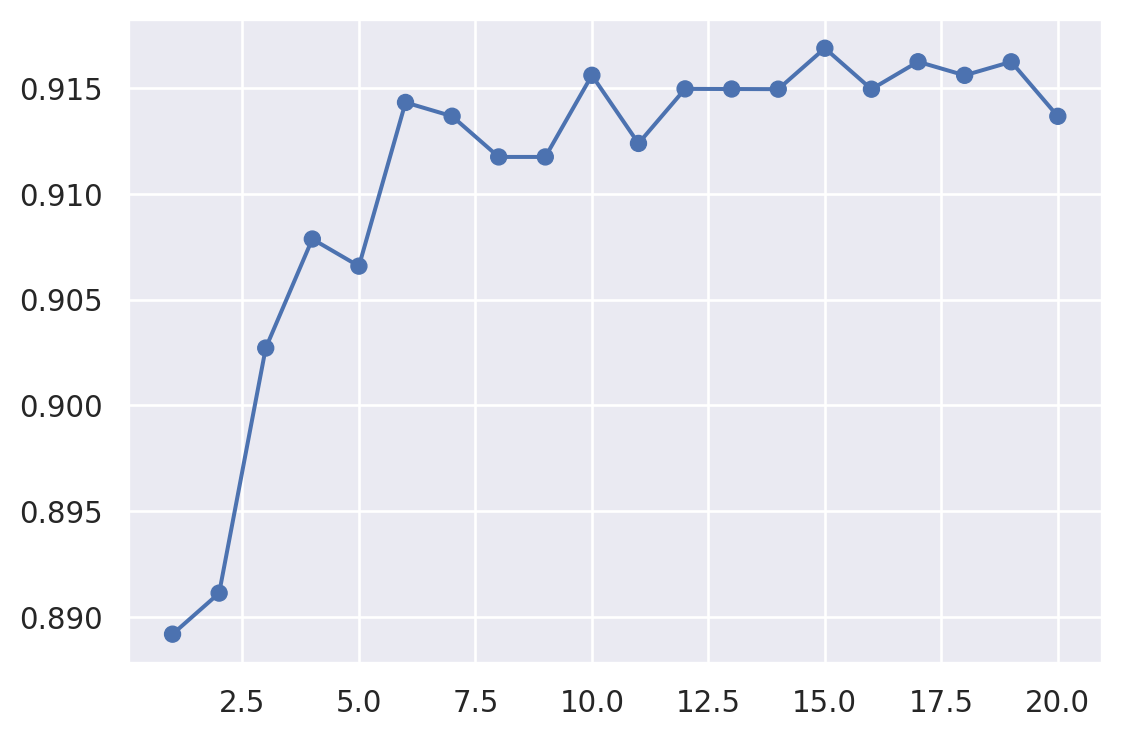

In [38]:
# Graficamos los scores
(
    so.Plot(x=k_values,y=scores)
    .add(so.Line())
    .add(so.Dot())
).layout(size=(6,4))

In [39]:
# Obtenemos el score máximo, en k=15
scores[14]

0.9168882895965149

Podemos observar que el $\texttt{score}$ máximo obtenido fue alrededor de 0.917 y en $K=15$

#### Inciso d

Para el valor de $K$ obtenido, ¿cuál es el porcentaje de aciertos en el conjunto de testeo?

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
# Inicializamos el modelo con k=15
knn = KNeighborsClassifier(n_neighbors=15)

# Lo entrenamos con los datos de entrenamiento
knn.fit(X_train,y_train)

# Predecimos el valor de y
y_pred = knn.predict(X_test)

# Evaluamos la precisión del modelo
accuracy_score(y_test,y_pred)

0.9434447300771208

In [42]:
# Otra manera de hacerlo
knn.score(X_test,y_test)

0.9434447300771208

#### Inciso e

Repetir el procedimiento utilizando las primeras dos componentes principales en vez de todas las variables. Indicar si se obtienen mejores resultados.

In [43]:
# Definimos df_pca como el dataFrame resultante de las componentes principales y la columna Pos_filt
df_pca = pd.DataFrame(componentesPrincipales,columns=["z1","z2"])
df_pca["Pos_filt"] = FBref["Pos_filt"]

# Visualizamos el resultado
df_pca

,z1,z2,Pos_filt
0,-0.340369,0.455232,DF
1,-1.178197,0.048355,DF
2,-1.138328,-0.347051,DF
3,-0.826074,-0.029431,DF
4,-1.182315,0.477778,DF
...,...,...,...
1936,0.388786,-0.721618,MF
1937,1.222869,0.691823,MF
1938,1.188614,0.027630,MF
1939,1.064984,-0.346285,MF


In [44]:
# Dividimos el conjunto el entrenamiento y testeo
df_pca_train, df_pca_test = train_test_split(df_pca,test_size=0.2,random_state=42)

In [45]:
# Definimos las variables explicativas y las variables respuesta
X_pca_train = df_pca_train.drop("Pos_filt",axis=1)
y_pca_train = df_pca_train["Pos_filt"]
X_pca_test = df_pca_test.drop("Pos_filt",axis=1)
y_pca_test = df_pca_test["Pos_filt"]

In [46]:
# Repetimos el proceso de evaluar los errores para los valores de k, ahora con df_pca
scores_pca = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_pca_train, y_pca_train, cv=5)
    scores_pca.append(np.mean(score))

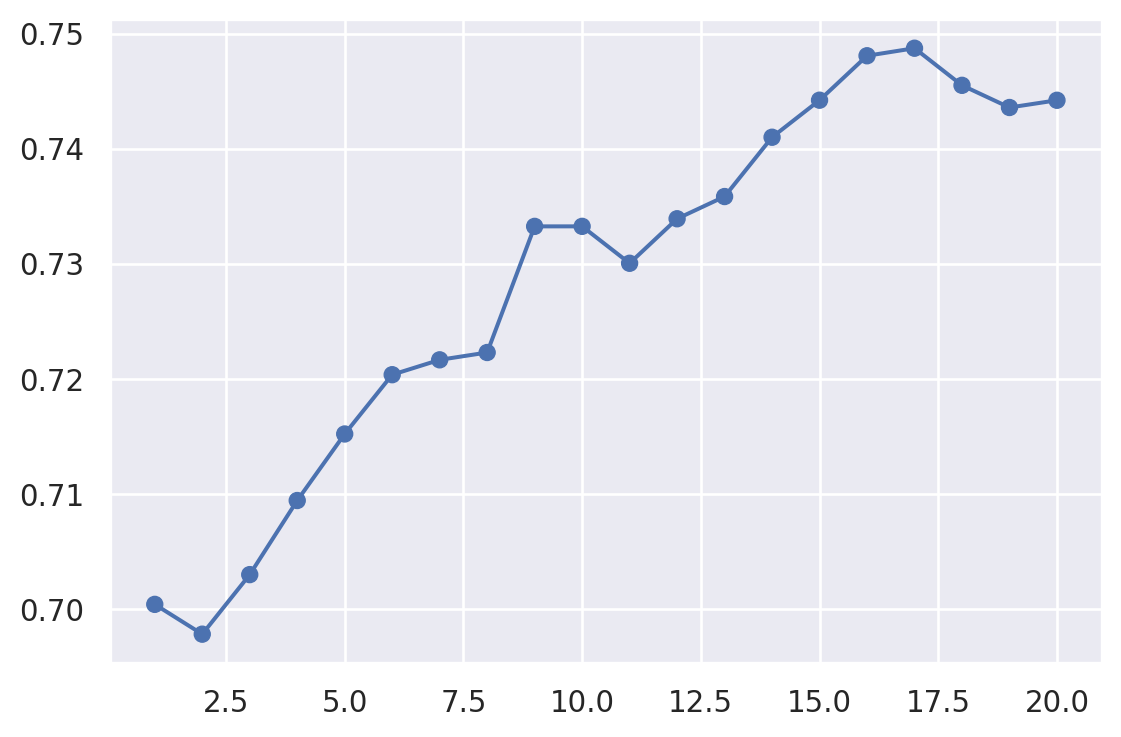

In [47]:
# Graficamos los resultados
(
    so.Plot(x=k_values,y=scores_pca)
    .add(so.Line())
    .add(so.Dot())
).layout(size=(6,4))

In [48]:
# Obtenemos el valor máximo, en k=17
scores_pca[16]

0.7487314593921792

Podemos observar que el $\texttt{score}$ máximo obtenido fue alrededor de 0.748 y en $K=17$

In [49]:
# Definimos un modelo de KNeighborsClasiffier con k=17
knn = KNeighborsClassifier(n_neighbors=17)

# Lo entrenamos con los datos de entrenamiento de las componentes principales
knn.fit(X_pca_train,y_pca_train)

# Predecimos la respuesta del conjunto de testeo
y_pca_pred = knn.predict(X_pca_test)

# Evaluamos la precisión del modelo
accuracy_score(y_pca_test,y_pca_pred)

0.7377892030848329

In [50]:
# Utilizando la otra manera
knn.score(X_pca_test,y_pca_test)

0.7377892030848329

Podemos observar que el rendimiento de $\texttt{KNeighborsClassifier}$ decayó mucho al utilizar los datos de las componentes principales.

### Ejercicio 8

Repetir el mismo método de clasificación con el dataset de jugadoras de la liga inglesa femenina $\texttt{superleague2023.csv}$. Para esto, quedarse con la columna $\texttt{Pos}$ y las columnas a partir de $\texttt{MP}$, inclusive. ¿Qué porcentaje de aciertos obtienen en este caso? ¿Pueden modificarse el parámetro para obtener un porcentaje mayor?

In [51]:
df_fem = pd.read_csv("superleague2023.csv")
df_fem

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,1,Princess Ademiluyi,eng ENG,"MF,FW",West Ham,17.0,2006.0,11,0,87,...,0.00,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03
1,2,Michelle Agyemang,eng ENG,FW,Arsenal,17.0,2006.0,1,0,6,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,3,Alyssa Aherne,eng ENG,MF,Everton,19.0,2004.0,1,0,1,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,4,Olga Ahtinen,fi FIN,MF,Tottenham,NaN,NaN,16,10,923,...,0.10,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15
4,5,Asmita Ale,eng ENG,DF,Leicester City,21.0,2001.0,6,4,296,...,0.00,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,Shelina Zadorsky,ca CAN,DF,Tottenham,30.0,1992.0,2,1,118,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
300,301,Katie Zelem,eng ENG,MF,Manchester Utd,27.0,1996.0,22,22,"1,980",...,0.05,0.27,0.32,0.0,0.27,0.07,0.27,0.34,0.04,0.30
301,302,Julia Zigiotti Olme,se SWE,MF,Brighton,25.0,1997.0,20,18,"1,568",...,0.00,0.06,0.06,0.0,0.06,0.03,0.06,0.09,0.03,0.09
302,303,Manuela Zinsberger,at AUT,GK,Arsenal,27.0,1995.0,18,18,"1,620",...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [52]:
# Eliminamos todas las columnas previas a MP
df_fem_num = df_fem.drop(df_fem.columns[0:7],axis=1)

# Verificamos el resultado
df_fem_num

,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,11,0,87,1.0,0,1,1,0,0,0,...,0.00,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03
1,1,0,6,0.1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0,1,0.0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,16,10,923,10.3,1,2,3,1,0,0,...,0.10,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15
4,6,4,296,3.3,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2,1,118,1.3,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
300,22,22,"1,980",22.0,1,6,7,0,1,1,...,0.05,0.27,0.32,0.0,0.27,0.07,0.27,0.34,0.04,0.30
301,20,18,"1,568",17.4,0,1,1,0,0,0,...,0.00,0.06,0.06,0.0,0.06,0.03,0.06,0.09,0.03,0.09
302,18,18,"1,620",18.0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [53]:
# Como observamos que Min no es una columna numérica porque tiene comas, las eliminamos y la pasamos a int
df_fem_num["Min"] = df_fem_num["Min"].apply(lambda x:x.replace(",","")).astype("int64")

In [54]:
# Redefinimos data_num como los datos escalados
df_fem_num[df_fem_num.columns] = MinMaxScaler().fit_transform(df_fem_num)

# Observamos el resultado
df_fem_num

,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,0.476190,0.000000,0.043456,0.045455,0.000000,0.125,0.041667,0.000000,0.000000,0.000000,...,0.000000,0.332258,0.160187,0.000000,0.160187,0.014354,0.000000,0.007075,0.014354,0.007075
1,0.000000,0.000000,0.002527,0.004545,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.714286,0.454545,0.465892,0.468182,0.047619,0.250,0.125000,0.047619,0.000000,0.000000,...,0.015552,0.064516,0.045101,0.015552,0.045101,0.019139,0.028302,0.035377,0.019139,0.035377
4,0.238095,0.181818,0.149065,0.150000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.028708,0.000000,0.014151,0.028708,0.014151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.047619,0.045455,0.059121,0.059091,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
300,1.000000,1.000000,1.000000,1.000000,0.047619,0.750,0.291667,0.000000,0.333333,0.333333,...,0.007776,0.087097,0.049767,0.000000,0.041991,0.033493,0.063679,0.080189,0.019139,0.070755
301,0.904762,0.818182,0.791814,0.790909,0.000000,0.125,0.041667,0.000000,0.000000,0.000000,...,0.000000,0.019355,0.009331,0.000000,0.009331,0.014354,0.014151,0.021226,0.014354,0.021226
302,0.809524,0.818182,0.818090,0.818182,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
# Definimos Pos_filt de la misma manera que antes, es decir, quedandonos con la primera posición que aparece
df_fem["Pos_filt"]=df_fem["Pos"].apply(lambda x: x[:2])

In [56]:
# Definimos fem_clasif como los datos para la clasificación
fem_clasif = df_fem_num
fem_clasif["Pos_filt"] = df_fem["Pos_filt"]

# Visualizamos los resultados
fem_clasif

,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,...,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG,Pos_filt
0,0.476190,0.000000,0.043456,0.045455,0.000000,0.125,0.041667,0.000000,0.000000,0.000000,...,0.332258,0.160187,0.000000,0.160187,0.014354,0.000000,0.007075,0.014354,0.007075,MF
1,0.000000,0.000000,0.002527,0.004545,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FW
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,MF
3,0.714286,0.454545,0.465892,0.468182,0.047619,0.250,0.125000,0.047619,0.000000,0.000000,...,0.064516,0.045101,0.015552,0.045101,0.019139,0.028302,0.035377,0.019139,0.035377,MF
4,0.238095,0.181818,0.149065,0.150000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.028708,0.000000,0.014151,0.028708,0.014151,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.047619,0.045455,0.059121,0.059091,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DF
300,1.000000,1.000000,1.000000,1.000000,0.047619,0.750,0.291667,0.000000,0.333333,0.333333,...,0.087097,0.049767,0.000000,0.041991,0.033493,0.063679,0.080189,0.019139,0.070755,MF
301,0.904762,0.818182,0.791814,0.790909,0.000000,0.125,0.041667,0.000000,0.000000,0.000000,...,0.019355,0.009331,0.000000,0.009331,0.014354,0.014151,0.021226,0.014354,0.021226,MF
302,0.809524,0.818182,0.818090,0.818182,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,GK


In [57]:
# Dividimos el DataFrame en datos de entrenamiento y testeo
fem_clasif_train, fem_clasif_test = train_test_split(fem_clasif,test_size=0.2,random_state=42)

In [58]:
# Definimos las variables predictoras y las predecidas
X_fem_train = fem_clasif_train.drop("Pos_filt",axis=1)
y_fem_train = fem_clasif_train["Pos_filt"]
X_fem_test = fem_clasif_test.drop("Pos_filt",axis=1)
y_fem_test = fem_clasif_test["Pos_filt"]

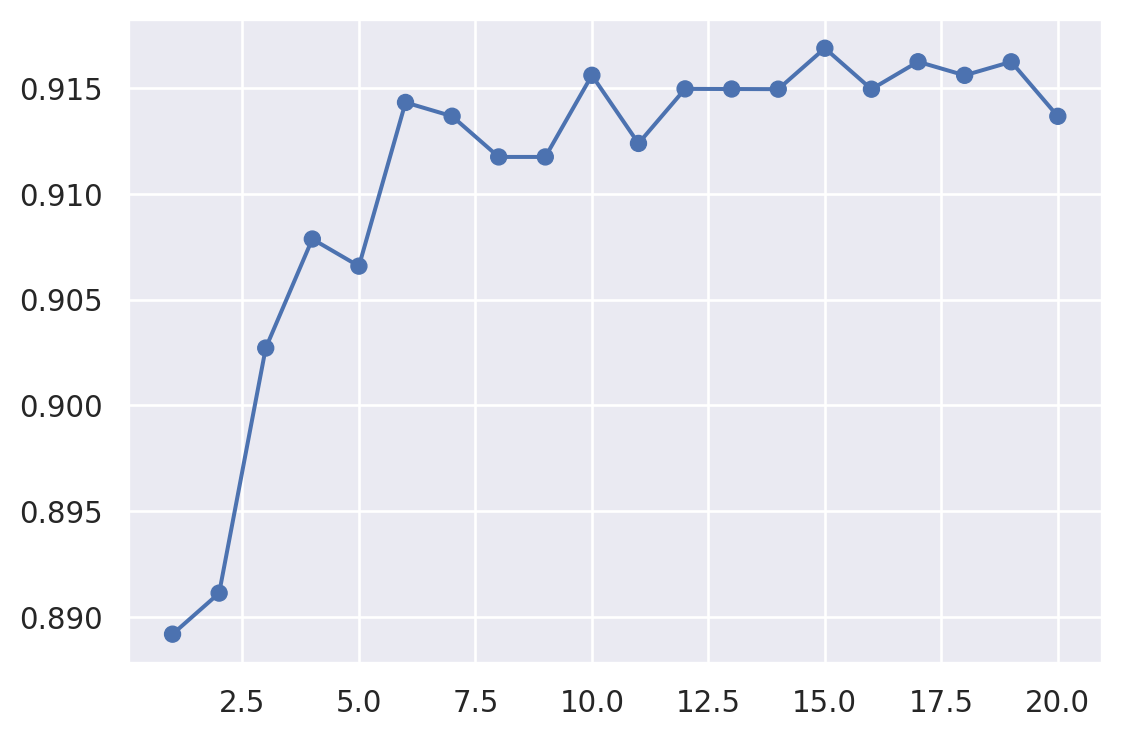

In [59]:
scores_fem = []


# Para cada valor de k, vamos guardando la media del score por validación cruzada en una lista scores_fem
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores_fem.append(np.mean(score))

# Graficamos el resultado
(
    so.Plot(x=k_values,y=scores_fem)
    .add(so.Line())
    .add(so.Dot())
).layout(size=(6,4))

In [60]:
# Obtenemos el maximo en k=15
scores_fem[16]

0.9162493517269992

Podemos observar que nos conviene tomar el valor de $K=15$

In [61]:
# Definimos un modelo de KNeighborsClasiffier con k=15
knn = KNeighborsClassifier(n_neighbors=15)

# Lo entrenamos con los datos de entrenamiento de las futbolistas mujeres
knn.fit(X_fem_train,y_fem_train)

# Predecimos la respuesta del conjunto de testeo
y_fem_pred = knn.predict(X_fem_test)

# Evaluamos la precisión del modelo
accuracy_score(y_fem_test,y_fem_pred)

0.5901639344262295

Vemos que obtenemos un resultado bastante deplorable, ¿podremos mejorarlo de alguna manera?

In [62]:
scores_fem = []

# Extendemos el rango de los k en los que evaluamos el rendimiento, para ver si podemos encontrar alguno mejor
# for k in range(1,100):
#    knn = KNeighborsClassifier(n_neighbors=k)
#    score = cross_val_score(knn, X_train, y_train, cv=5)
#    scores_fem.append(np.mean(score))

In [63]:
# Graficamos los resultados
(
    so.Plot(x=range(1,100),y=scores_fem)
    .add(so.Line())
    .add(so.Dot())
).layout(size=(6,4))

KeyError: 'y'

Obsevamos que a partir de $k=15$, el gráfico tiene un comportamiento asintótico, por lo que no, no podemos mejorar el resultado cambiando el parámetro.

## Recomendaciones de jugadores

### Ejercicio 9 

Trabajamos ahora con el dataset $\texttt{transfermarkt\_fbref\_201920.csv}$ que incluye la valuación de los jugadores. Una de las aplicaciones más comunes de análisis de datos en el fútbol es para obtener recomendaciones de jugadores a comprar.

Si al leer el $\texttt{.csv}$ salta un error, intentar con:

`data=pd.read_csv('transfermarkt_fbref_201920.csv',delimiter=';')`

In [64]:
# Cargamos el df y eliminamos una columna inútil
tmarket = pd.read_csv('transfermarkt_fbref_201920.csv',delimiter=';')
tmarket = tmarket.drop("Column1", axis = 1)
tmarket

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,Martin Aguirregabiria,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
1,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
2,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
3,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,left,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
4,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,Daniel Podence,pt POR,"FW,MF",Wolves,23,1995,12000000,165,Forward - Right Winger,right,...,1.55,47.1,34.8,12.3,0.32,24758,0,0,NaN,201920#
2640,Romain Saïss,ma MAR,DF,Wolves,29,1990,4000000,188,Defender - Centre-Back,left,...,1.55,47.1,34.8,12.3,0.32,24758,0,0,NaN,201920#
2641,Adama Traoré,es ESP,"FW,MF",Wolves,23,1996,25000000,178,Forward - Right Winger,right,...,1.55,47.1,34.8,12.3,0.32,24758,0,0,NaN,201920#
2642,Jesús Vallejo,es ESP,DF,Wolves,22,1997,6000000,184,Defender - Centre-Back,right,...,1.55,47.1,34.8,12.3,0.32,24758,0,0,NaN,201920#


Para todo este ejercicio decidimos hacer un análisis sobre todas las variables númericas. Para ello decidimos primero descartar las columnas de tipo categórica y luego algunas númericas más que creemos que van a empeorar nuestro análisis.

In [65]:
display(tmarket.head(), tmarket.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Columns: 399 entries, player to Season
dtypes: float64(239), int64(151), object(9)
memory usage: 8.0+ MB


,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,Martin Aguirregabiria,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
1,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
2,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
3,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,left,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
4,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#


None

In [66]:
# Veamos primero si hay algún dato faltante
with pd.option_context("display.max_rows",None):
    print(tmarket.isna().sum())

player                                      0
nationality                                 0
position                                    0
squad                                       0
age                                         0
birth_year                                  0
value                                       0
height                                      0
position2                                   0
foot                                       16
league                                      0
games                                       0
games_starts                                0
minutes                                     0
goals                                       0
assists                                     0
pens_made                                   0
pens_att                                    0
cards_yellow                                0
cards_red                                   0
goals_per90                                 0
assists_per90                     

In [67]:
# Veamos ahora cuales son las columnas del tipo Object en nuestro df
columnas_object = tmarket.select_dtypes(include='object')

# Visualizamos dichas columnas
columnas_object

,player,nationality,position,squad,position2,foot,league,Attendance,Season
0,Martin Aguirregabiria,es ESP,DF,Alavés,Defender - Right-Back,right,La Liga,"12,177",201920#
1,Oliver Burke,sco SCO,"MF,FW",Alavés,Forward - Right Winger,right,La Liga,"12,177",201920#
2,Ví­ctor Camarasa,es ESP,MF,Alavés,Midfielder - Central Midfield,right,La Liga,"12,177",201920#
3,Rubén Duarte,es ESP,DF,Alavés,Defender - Left-Back,left,La Liga,"12,177",201920#
4,Rodrigo Ely,br BRA,DF,Alavés,Defender - Centre-Back,right,La Liga,"12,177",201920#
...,...,...,...,...,...,...,...,...,...
2639,Daniel Podence,pt POR,"FW,MF",Wolves,Forward - Right Winger,right,Premier League,24758,201920#
2640,Romain Saïss,ma MAR,DF,Wolves,Defender - Centre-Back,left,Premier League,24758,201920#
2641,Adama Traoré,es ESP,"FW,MF",Wolves,Forward - Right Winger,right,Premier League,24758,201920#
2642,Jesús Vallejo,es ESP,DF,Wolves,Defender - Centre-Back,right,Premier League,24758,201920#


In [68]:
# Borramos columnas que no nos parecen relevantes para predecir el valor de un jugador, o ver cuál jugador es más parecido a otro
columnasAborrar = ["player", "nationality", "squad", "position2","foot", "league", "Attendance",
                       "Season", "W", "D", "L", "MP", "CL", "WinCL", "birth_year", "CLBestScorer"]
df_num = tmarket.drop(columnasAborrar, axis = 1)

# Nos aseguramos que queden sólo variables numéricas
df_num = df_num.select_dtypes(include=["int64", "float64"])

In [69]:
# Escalamos los datos al intervalo [0,1]
df_num[df_num.columns] = MinMaxScaler().fit_transform(df_num)

#### Inciso a

En 2021, Messi fue transferido del Barcelona al PSG. Basándonse en los datos disponibles, recomendarle a Barcelona un jugador de características similares a Messi pero de menor valor.

In [70]:
# Obtenemos una rápida visualización de Messi, para conocerlo un poco
tmarket[tmarket["player"] == "Lionel Messi"]

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
257,Lionel Messi,ar ARG,"FW,MF",Barcelona,32,1987,112000000,170,Forward - Right Winger,left,...,2.16,66.4,36.0,30.4,0.8,54223,1,0,0.0,201920#


In [100]:
# Definimos una función que nos devuelva los primeros 10 jugadores más parecidos para un jugador determinado
def jugadores_recomendados (nombre_jugador, cant_recomendaciones):
    # Obtenemos el índice del jugador
    ind_jugador = tmarket[tmarket["player"]==nombre_jugador].index[0]

    # Inicializamos un NearestNeighbors que busque los n+1 jugadores más parecidos al buscado (porque incluye al jugador buscado)
    neighbors = NearestNeighbors(n_neighbors = cant_recomendaciones+1).fit(df_num)

    # Obtenemos las distancias a esos jugadores y sus índices
    distances, indices = neighbors.kneighbors(df_num.iloc[[ind_jugador]])

    # Devolvemos el dataset evaluado en esos índices
    res = tmarket.iloc[indices.flatten()]

    # Eliminamos de la lista al mismo jugador
    res = res.drop(ind_jugador, axis=0)
    
    return res

In [101]:
jugadores_recomendados("Lionel Messi", 10)

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
144,Papu Gómez,ar ARG,"MF,FW",Atalanta,31,1988,15000000,165,Forward - Second Striker,right,...,2.05,81.9,41.4,40.4,1.06,11167,1,0,0.0,201920#
1415,Kevin De Bruyne,be BEL,MF,Manchester City,28,1991,120000000,181,Midfielder - Attacking Midfield,right,...,2.13,93.0,34.7,58.3,1.53,37097,1,0,0.0,201920#
695,Jadon Sancho,eng ENG,"FW,MF",Dortmund,19,2000,117000000,180,Forward - Right Winger,right,...,2.03,59.2,39.4,19.8,0.58,57297,1,0,0.0,201920#
1080,Paulo Dybala,ar ARG,"FW,MF",Juventus,25,1993,72000000,177,Forward - Second Striker,left,...,2.18,68.9,41.8,27.1,0.71,25102,1,0,0.0,201920#
1846,Ángel Di Marí­a,ar ARG,"FW,MF",Paris S-G,31,1988,32000000,180,Forward - Right Winger,left,...,2.52,70.9,22.7,48.2,1.78,47517,1,0,0.0,201920#
1129,Luis Alberto,es ESP,MF,Lazio,26,1992,50000000,182,Midfielder - Attacking Midfield,right,...,2.05,68.4,49.6,18.9,0.50,26363,1,0,0.0,201920#
1328,Mohamed Salah,eg EGY,FW,Liverpool,27,1992,120000000,175,Forward - Right Winger,left,...,2.61,71.5,40.0,31.5,0.83,41955,1,1,0.0,201920#
1093,Cristiano Ronaldo,pt POR,FW,Juventus,34,1985,60000000,187,Forward - Left Winger,both,...,2.18,68.9,41.8,27.1,0.71,25102,1,0,0.0,201920#
1423,Riyad Mahrez,dz ALG,FW,Manchester City,28,1991,48000000,179,Forward - Right Winger,left,...,2.13,93.0,34.7,58.3,1.53,37097,1,0,0.0,201920#
1679,Lorenzo Insigne,it ITA,"FW,MF",Napoli,28,1991,48000000,163,Forward - Left Winger,right,...,1.63,62.5,39.3,23.2,0.61,21622,0,0,0.0,201920#


Nuestra recomendación para el Barcelona son entonces: Papu Gómez, Di María, Mahrez o Insigne.

#### Inciso b

Queremos elaborar un modelo para detectar jugadores "baratos", es decir, cuya valuación en el mercado (columna $\texttt{value}$) sea inferior a la que nosotros estimemos. Para esto, quisiéramos ajustar el valor de mercado a partir de los datos de los jugadores (para estimar la valuación pueden incorporar la edad entre las variables explicativas). El modelo que desarrollen puede basarse en redes neuronales o en otro modelo que consideren adecuado.

In [73]:
tmarket.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,Martin Aguirregabiria,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
1,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
2,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
3,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,left,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
4,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,right,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#


In [74]:
data = tmarket.drop(columnasAborrar, axis =1)
data = data.select_dtypes(include=["float64","int64"])
data
# Acá elijo con qué columnas me voy a quedar

,age,value,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,LgRk,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90
0,23,4000000,178,31,23,2099,1,1,0,0,...,16,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43
1,22,4000000,188,31,14,1429,1,2,0,0,...,16,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43
2,25,4000000,183,17,15,1293,0,1,0,0,...,16,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43
3,23,4000000,172,31,30,2663,0,1,0,0,...,16,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43
4,25,1000000,188,25,24,2121,2,0,0,0,...,16,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,23,12000000,165,9,3,289,1,0,0,0,...,7,51,40,11,59,1.55,47.1,34.8,12.3,0.32
2640,29,4000000,188,33,31,2705,2,1,0,0,...,7,51,40,11,59,1.55,47.1,34.8,12.3,0.32
2641,23,25000000,178,37,27,2605,4,9,0,0,...,7,51,40,11,59,1.55,47.1,34.8,12.3,0.32
2642,22,6000000,184,2,1,163,0,0,0,0,...,7,51,40,11,59,1.55,47.1,34.8,12.3,0.32


In [75]:
X = data.drop(columns=['value']) # Las columnas con las que vamos a predecir
y = data['value']                # La columna a predecir


# Separamos en conjuntos de train y test, luego escalamos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
scaler_X = MinMaxScaler().set_output(transform="pandas")
scaler_y = MinMaxScaler().set_output(transform="pandas")
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(pd.DataFrame(y_train))
y_test = scaler_y.transform(pd.DataFrame(y_test))

In [76]:
keras.utils.set_random_seed(9)

# Paso 1: iniciamos el modelo indicando la arquitectura de la red
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)), # Seleccionamos la dim del input
    keras.layers.Dense(200,                          # Selccionamos la dim de la 1er capa
                       activation='sigmoid'),# Función de activación de la 1er capa
    keras.layers.Dense(100,
                       activation="tanh"),
    keras.layers.Dense(1,                          # Seleccionamos la dim de la 2da capa, y debe coincidir con la "y" a predecir
                       activation='sigmoid')       # Función de activación de la 2da capa
])

# Paso 2: configuramos el optimizador
optimizer = keras.optimizers.SGD(learning_rate=0.5) # Elegimos el learning rate

# Paso 3: construimos el modelo
model.compile(
    optimizer=optimizer,
    loss='mean_squared_error',  # Elegimos nuestra función de error
)

# Paso 4: entrenamiento del modelo.
hist = model.fit(X_train.to_numpy(), y_train.to_numpy(), # Le pasamos nuestros datos de train
                 epochs=100,                             # Elegimos la cantidad de epocas que queremos
                 batch_size=20,                          # Elegimos el tamaño del batch
                 validation_split=0.2,                   # Elegimos el tamaño del validation_split
                 verbose=0,                              # Oculta todo el proceso
                 )

# Paso 5: calculamos el error en el conjunto de testeo
model.evaluate(X_test.to_numpy(), y_test.to_numpy(),    # Le pasamos los datos de test
               verbose=0,                               # Ocultamos el proceso
               batch_size=len(y_test),                  # Un solo batch
               return_dict=True
               )

{'loss': 0.006695085670799017}

Como observamos que el error es bastante bajo, nos quedamos con este modelo.

#### Inciso c

Según el modelo desarrollado, entre los jugadores con un valor de mercado mayor a $100000, ¿quién es el más sobrevalorado? Es decir, el jugador con mayor diferencia entre el valor de mercado y el valor predicho por el modelo. ¿Y el más infravalorado?

In [78]:
# Definimos escaladore para X e y
scaler_X = MinMaxScaler().set_output(transform="pandas")
scaler_y = MinMaxScaler().set_output(transform="pandas")
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(pd.DataFrame(y))

In [79]:
hist = model.fit(X.to_numpy(), y.to_numpy(), # Le pasamos nuestros datos de train
                 epochs=100,                             # Elegimos la cantidad de epocas que queremos
                 batch_size=20,                          # Elegimos el tamaño del batch
                 validation_split=0.2,                   # Elegimos el tamaño del validation_split
                 verbose=0,                              # Oculta todo el proceso
                 )


In [80]:
# Obtenemos la predicción de nuestro modelo del valor de los jugadores, escalada
pred = model.predict(X.to_numpy()).flatten()

# La "desescalamos"
pred = scaler_y.inverse_transform(pd.DataFrame(pred))

# Mostramos los resultados
pred

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step


array([[ 5595752. ],
       [ 5038332.5],
       [ 4070338. ],
       ...,
       [59309312. ],
       [ 5840789.5],
       [ 8332866.5]], dtype=float32)

In [81]:
# Creamos una nueva columna value_pred donde guardaremos el valor que nuestro modelo le asigno a cada jugador
data["value_pred"] = pred.flatten()

# Mostramos los resultados
data

,age,value,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,GF,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,value_pred
0,23,4000000,178,31,23,2099,1,1,0,0,...,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,5595752.0
1,22,4000000,188,31,14,1429,1,2,0,0,...,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,5038332.5
2,25,4000000,183,17,15,1293,0,1,0,0,...,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,4070338.0
3,23,4000000,172,31,30,2663,0,1,0,0,...,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,3585008.0
4,25,1000000,188,25,24,2121,2,0,0,0,...,34,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,6460611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,23,12000000,165,9,3,289,1,0,0,0,...,51,40,11,59,1.55,47.1,34.8,12.3,0.32,10213721.0
2640,29,4000000,188,33,31,2705,2,1,0,0,...,51,40,11,59,1.55,47.1,34.8,12.3,0.32,18218816.0
2641,23,25000000,178,37,27,2605,4,9,0,0,...,51,40,11,59,1.55,47.1,34.8,12.3,0.32,59309312.0
2642,22,6000000,184,2,1,163,0,0,0,0,...,51,40,11,59,1.55,47.1,34.8,12.3,0.32,5840789.5


In [82]:
# Definimos la columna dif que nos dice la diferencia entre en valor real y el valor predicho
data["dif"] = data["value"] - data["value_pred"]

# Mostramos los resultados
data

,age,value,height,games,games_starts,minutes,goals,assists,pens_made,pens_att,...,GA,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,value_pred,dif
0,23,4000000,178,31,23,2099,1,1,0,0,...,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,5595752.0,-1595752.0
1,22,4000000,188,31,14,1429,1,2,0,0,...,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,5038332.5,-1038332.5
2,25,4000000,183,17,15,1293,0,1,0,0,...,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,4070338.0,-70338.0
3,23,4000000,172,31,30,2663,0,1,0,0,...,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,3585008.0,414992.0
4,25,1000000,188,25,24,2121,2,0,0,0,...,59,-25,39,1.03,37.0,53.2,-16.2,-0.43,6460611.0,-5460611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,23,12000000,165,9,3,289,1,0,0,0,...,40,11,59,1.55,47.1,34.8,12.3,0.32,10213721.0,1786279.0
2640,29,4000000,188,33,31,2705,2,1,0,0,...,40,11,59,1.55,47.1,34.8,12.3,0.32,18218816.0,-14218816.0
2641,23,25000000,178,37,27,2605,4,9,0,0,...,40,11,59,1.55,47.1,34.8,12.3,0.32,59309312.0,-34309312.0
2642,22,6000000,184,2,1,163,0,0,0,0,...,40,11,59,1.55,47.1,34.8,12.3,0.32,5840789.5,159210.5


In [91]:
# Obtenemos el índice del jugador más sobrevalorado
data["dif"].idxmax()

2341

In [90]:
# Obtenemos al jugador más sobrevalorado del mundo
tmarket.iloc[data["dif"].idxmax()]["player"]

'Harry Kane'

In [92]:
# Obtenemos al jugador más infravalorado del mundo
tmarket.iloc[data["dif"].idxmin()]["player"]

'Karim Benzema'

#### Inciso d

El PSG quiere vender a Mbappé y reemplazarlo por otro jugador más barato. Hacer un listado de los 10 jugadores más parecidos a Mbappé según el crietrio que elijan. De esos 10 jugadores, según el modelo que desarrollaron en el ítem anterior, ¿a qué jugador recomendarían teniendo en cuenta la valuación del mercado y la predicción del modelo? Para ese jugador, averiguar la valuación actual del jugador. ¿Hicieron una buena recomendación?

In [102]:
# Observamos los datos de Mbappé para tenerlos como referencia
tmarket[tmarket["player"]=="Kylian Mbappé"] 

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
1858,Kylian Mbappé,fr FRA,FW,Paris S-G,20,1998,180000000,178,Forward - Left Winger,right,...,2.52,70.9,22.7,48.2,1.78,47517,1,0,0.0,201920#


In [104]:
# Definimos recomendacion como el DataFrame que tiene a los 10 jugadores más parecidos a Mbappé
recomendacion = jugadores_recomendados("Kylian Mbappé",10)

# Mostramos los resultados
recomendacion

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
265,Luis Suárez,uy URU,FW,Barcelona,32,1987,28000000,182,Forward - Centre-Forward,right,...,2.16,66.4,36.0,30.4,0.80,54223,1,0,0.0,201920#
162,Duván Zapata,co COL,FW,Atalanta,28,1991,36000000,189,Forward - Centre-Forward,right,...,2.05,81.9,41.4,40.4,1.06,11167,1,0,0.0,201920#
1411,Sergio AgíĽero,ar ARG,FW,Manchester City,31,1988,52000000,173,Forward - Centre-Forward,right,...,2.13,93.0,34.7,58.3,1.53,37097,1,0,0.0,201920#
1862,Neymar,br BRA,"MF,FW",Paris S-G,27,1992,128000000,175,Forward - Left Winger,right,...,2.52,70.9,22.7,48.2,1.78,47517,1,0,0.0,201920#
274,Kingsley Coman,fr FRA,"FW,MF",Bayern Munich,23,1996,40000000,180,Forward - Left Winger,right,...,2.41,82.3,34.3,48.0,1.41,57353,1,0,0.0,201920#
1933,Vinicius Júnior,br BRA,"FW,MF",Real Madrid,19,2000,50000000,176,Forward - Left Winger,right,...,2.29,63.5,28.4,35.1,0.92,45833,1,0,0.0,201920#
589,Christian Pulisic,us USA,FW,Chelsea,20,1998,54000000,172,Forward - Left Winger,right,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
1082,Gonzalo Higuaí­n,ar ARG,FW,Juventus,31,1987,25000000,184,Forward - Centre-Forward,right,...,2.18,68.9,41.8,27.1,0.71,25102,1,0,0.0,201920#
275,Philippe Coutinho,br BRA,"MF,FW",Bayern Munich,27,1992,56000000,172,Midfielder - Attacking Midfield,right,...,2.41,82.3,34.3,48.0,1.41,57353,1,0,0.0,201920#
279,Serge Gnabry,de GER,"FW,MF",Bayern Munich,24,1995,72000000,176,Forward - Right Winger,right,...,2.41,82.3,34.3,48.0,1.41,57353,1,0,0.0,201920#


In [115]:
# Obtenemos el valor que nuestro modelo predice para cada jugador de nuestra lista
recomendaciones_pred = data.iloc[recomendacion.index]["dif"]
recomendaciones_pred

265    -12663084.0
162    -26355528.0
1411      219996.0
1862    31778224.0
274    -27674688.0
1933   -14684472.0
589     -5889200.0
1082    -8491104.0
275       740272.0
279    -15111720.0
Name: dif, dtype: float64

In [116]:
# Obtenemos el id del jugador más "infravalorado"
recomendaciones_pred.idxmin()

274

In [122]:
# El jugador parecido a Mbappé con mejor relación calidad-precio
recomendacion.loc[274]["player"]

'Kingsley Coman'

Coman ganó la Champions con gol suyo al año siguiente

⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️INSERTAR FOTO DEL PRECIO ACTUAL DE COMAN⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️ Acordarse de poner la foto de Benzema ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️ Acordarse de los distintos pedidos del  técnico en KNN ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️ Decorar con fotitos ⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️